In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [11]:
df_target

,Cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [9]:
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## EDA

<AxesSubplot:ylabel='count'>

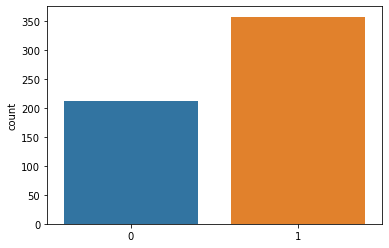

In [12]:
sns.countplot(x='target',data=cancer)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

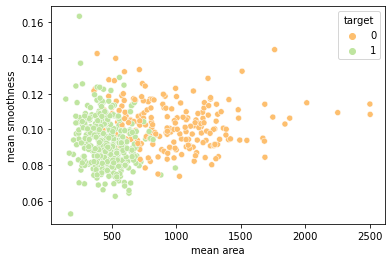

In [22]:
sns.scatterplot(x=df_feat['mean area'], y=df_feat['mean smoothness'],hue='target',data=cancer,palette='Spectral' )

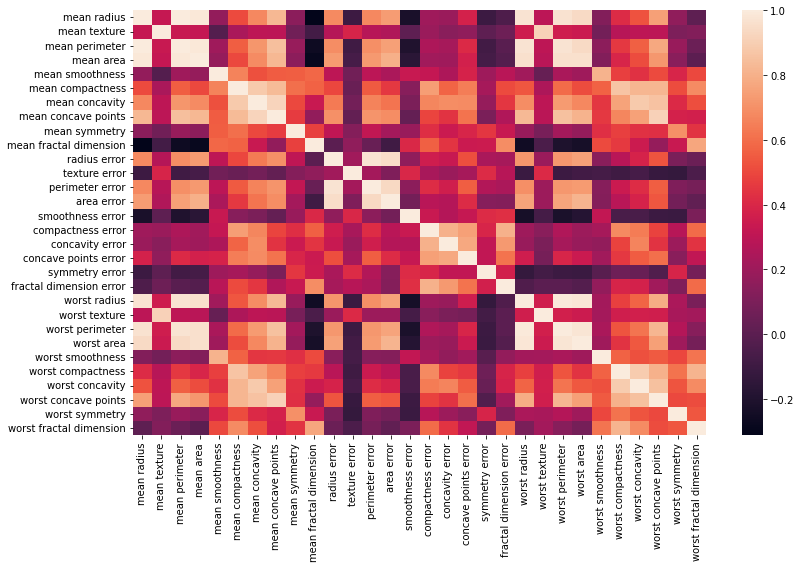

In [29]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df_feat.corr(), annot=False) 
plt.tight_layout()

### Train test splitting

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, np.ravel(df_target), test_size=0.30, random_state=101)

### Using SVM

In [32]:
from sklearn.svm import SVC

In [33]:
svc=SVC()

In [34]:
svc.fit(X_train,y_train)

SVC()

In [45]:
pred1 = svc.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [47]:
print(confusion_matrix(y_test,pred1))

[[ 56  10]
 [  3 102]]


### Using KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [44]:
pred2=knn.predict(X_test)

In [48]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        66
           1       0.93      0.97      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [50]:
print(confusion_matrix(y_test,pred2))

[[ 58   8]
 [  3 102]]


In [51]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

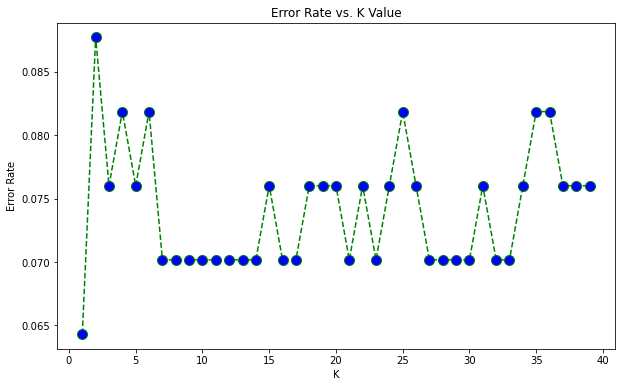

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
new_knn=KNeighborsClassifier(n_neighbors=6)

In [55]:
new_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [56]:
new_pred=new_knn.predict(X_test)

In [57]:
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.93      0.94      0.93       105

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [58]:
print(confusion_matrix(y_test,new_pred))

[[58  8]
 [ 6 99]]


### Using Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dtree=DecisionTreeClassifier()

In [61]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
pred3=dtree.predict(X_test)

In [63]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        66
           1       0.93      0.94      0.93       105

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [64]:
print(confusion_matrix(y_test,pred3))

[[58  8]
 [ 6 99]]


### Using Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier()

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
pred4=rfc.predict(X_test)

In [69]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.97      0.96      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [70]:
print(confusion_matrix(y_test,pred4))

[[ 63   3]
 [  4 101]]
